In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("Real estate.csv",index_col=False)

In [3]:
df=df.drop("No",axis=1)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
for i in df.columns[:-1]:
    print(i)

X1 transaction date
X2 house age
X3 distance to the nearest MRT station
X4 number of convenience stores
X5 latitude
X6 longitude


In [5]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
df1=pd.read_csv("Real estate.csv")

In [7]:
class Linear_Regression():
    def __init__(self,l_rate,Epochs):
        
        self.l_rate=l_rate
        self.Epochs=Epochs
        
    def fit(self, X, Y ):
        
        self.m,self.n = X.shape
        on=np.ones((self.m,1))
        self.X=np.concatenate((on,X),axis=1)
        self.n=self.n+1
        self.Y=Y
        self.W=np.zeros(self.n)
        self.H=np.dot(self.X,self.W)
        self.Cost=np.zeros(self.Epochs)
        
        for i in range(self.Epochs):
            self.upd_weight()
            self.Cost[i]=np.sum(np.square(self.H-self.Y))/(2*self.m)
        return self
    
    def upd_weight(self):
        
        self.W[0]=self.W[0]-(self.l_rate/self.m)*sum(self.H-self.Y)
        for i in range(1,self.n):
            self.W[i]=self.W[i]-(self.l_rate/self.m)*sum((self.H-self.Y)*self.X[:,i])
        self.H=np.dot(self.X,self.W)
        return self
    
    def W_C(self):
        
        print(self.W[0])
        print(self.W[1:])
        
    def predict(self,X):
        
        return X.dot(self.W[1:])+self.W[0]

def norm(df1):
    for i in df1.columns[:]:
        df1[i]=df1[i]-df1[i].mean()
        df1[i]=df1[i]/np.sqrt(df1[i].var())
    #return np.array(df1)
    return df1

### Part a
You will need to perform K-Fold cross-validation (K=2-5) in this exercise<br>
(implement from scratch). What is the optimal value of K? Justify it in your<br>
report along with the table for the mean accuracy of K-values and K-value.

In [8]:
def K_fold_validation(k,df):
    n=len(df.index)
    fold_size=n//k
    if(n%k>0):
        fold_size+=1
    df = df.reindex(np.random.permutation(df.index)) 
    df = df.reset_index(drop=True)
    df=np.array(df)
    #print(fold_size)
    l=[]
    k=0
    while(k<n):        
        l.append(df[k:k+fold_size,:])
        k+=fold_size
        
        
#         print("=======================================================================================================")
    
    X_Trains=[]
    Y_Trains=[]
    X_Tests=[]
    Y_Tests=[]
    for i in range(len(l)):
        temp=[]
        for j in range(len(l)):
            if(j!=i):
                temp.append(pd.DataFrame(l[j]))
        t_df=np.array(pd.concat(temp))
        X_Trains.append(t_df[:,:-1])
        Y_Trains.append(t_df[:,-1])
        X_Tests.append(l[i][:,:-1])
        Y_Tests.append(l[i][:,-1])
        
    return X_Trains,Y_Trains,X_Tests,Y_Tests
            
    


In [9]:
results_mse=[]
# results_mle=[]
for i in range(2,6):
    l=[]
#     l1=[]
    X_Trains, Y_Trains, X_Tests, Y_Tests = K_fold_validation(i,norm(pd.read_csv("Real estate.csv")))
    for j in range(i):
        model=Linear_Regression(0.01,20000)
        model.fit(X_Trains[j],Y_Trains[j])
        y_pred=model.predict(X_Tests[j])
        difference_array = np.subtract(y_pred, Y_Tests[j])
        squared_array = np.square(difference_array)
        mse = squared_array.mean()
        l.append(mse)
#         l1.append(difference_array.mean())
    results_mse.append(np.sum(l)/len(l))
#     results_mle.append(np.sum(l1)/len(l1))

In [10]:
print("K| MSE ")
for i in range(2,6):
    print("{}| {}".format(i,results_mse[i-2]))


K| MSE 
2| 0.48138327722866797
3| 0.43327257038518413
4| 0.42797314694324884
5| 0.4320416914330435


If we look at Mse k=5 is the best 

### Part B
Plot the RMSE V/s iteration graph for all models trained with optimal<br>
value of K for K-Fold cross-validation. RMSE should be reported on the train <br>
and val set.
<br><br>
Choosen K = 5

In [11]:
#added the RMSE list for validation as well tranning set to the model

class Linear_Regression1():
    def __init__(self,l_rate,Epochs):
        
        self.l_rate=l_rate
        self.Epochs=Epochs
        
    def fit(self, X, Y ,X_test,Y_test):
        
        self.m,self.n = X.shape
        on=np.ones((self.m,1))
        self.X=np.concatenate((on,X),axis=1)
        self.n=self.n+1
        self.Y=Y
        self.W=np.zeros(self.n)
        self.H=np.dot(self.X,self.W)
        self.Cost=np.zeros(self.Epochs)
        self.val_err=[]
        self.tr_err=[]
        
        
        
        for i in range(self.Epochs):
            self.upd_weight()
            self.val_err.append(self.rmse(Y_test,self.predict(X_test)))
            self.tr_err.append(self.rmse(Y,self.predict(X)))
            self.Cost[i]=np.sum(np.square(self.H-self.Y))/(2*self.m)
        #self.plot1()
        print("RMSE for tranning set => {}".format(self.tr_err[-1]))
        print("RMSE for validation set => {}".format(self.val_err[-1]))
        return self
    
    def upd_weight(self):
        
        self.W[0]=self.W[0]-(self.l_rate/self.m)*sum(self.H-self.Y)
        for i in range(1,self.n):
            self.W[i]=self.W[i]-(self.l_rate/self.m)*sum((self.H-self.Y)*self.X[:,i])
        self.H=np.dot(self.X,self.W)
        return self
    
    def W_C(self):
        print(self.W[0])
        print(self.W[1:])
        
    def rmse(self,y1,y2):
        mse = (np.square(y1 - y2)).mean()
        return np.sqrt(mse)
    def plot1(self):
        list1 = list(range(0,self.Epochs))
        
        plt.plot(list1,self.tr_err,label='Tranning set')
        plt.plot(list1,self.val_err,label='Validation set')
        plt.xlabel('Iterations')
        plt.ylabel('RMSE')
#         plt.title("k= "+str(i)+" and model number="+str(j+1)+"th")
        plt.legend()
        plt.show()
        
        plt.plot(list1,self.Cost,color='g',label='cost')
#         plt.title("Cost function for K = "+str(i)+" and model number="+str(j+1))
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.legend()
        plt.show()
    def predict(self,X):
        
        return X.dot(self.W[1:])+self.W[0]

k= 5 and model number=1
RMSE for tranning set => 0.6455807116763345
RMSE for validation set => 0.652294284531606


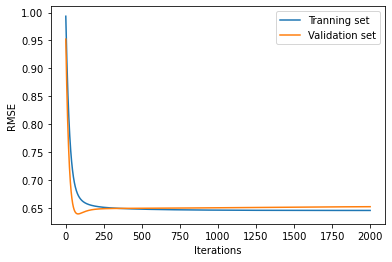

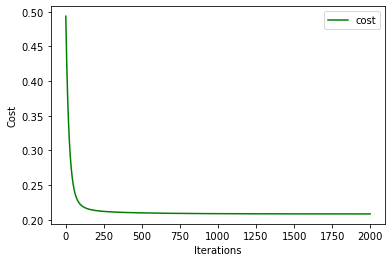

k= 5 and model number=2
RMSE for tranning set => 0.6673322954749914
RMSE for validation set => 0.5511216204356201


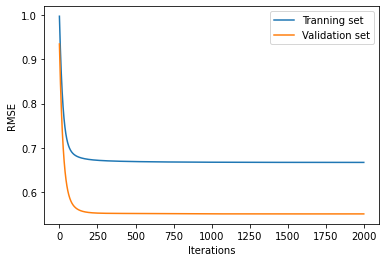

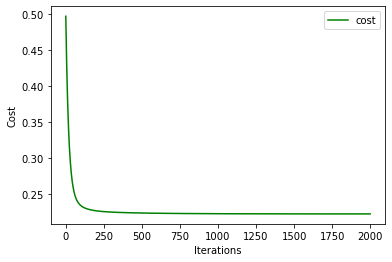

k= 5 and model number=3
RMSE for tranning set => 0.6337213018795999
RMSE for validation set => 0.6938312819257478


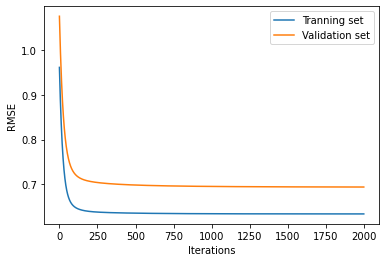

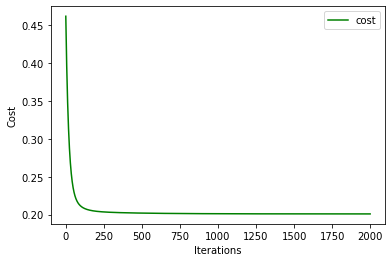

k= 5 and model number=4
RMSE for tranning set => 0.5978329170873334
RMSE for validation set => 0.8115815436018022


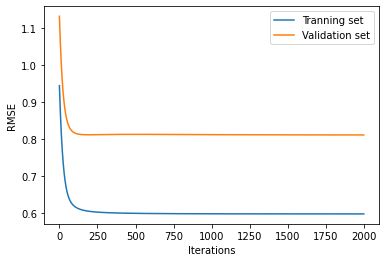

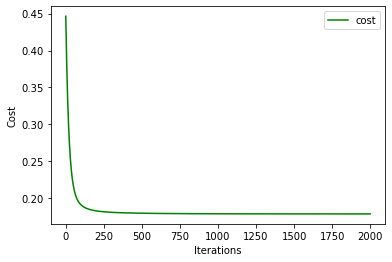

k= 5 and model number=5
RMSE for tranning set => 0.6673537073840736
RMSE for validation set => 0.5595258522593299


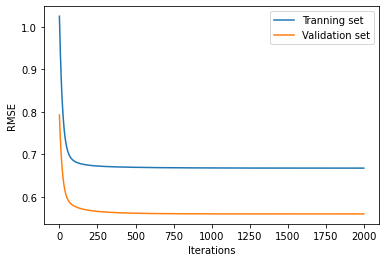

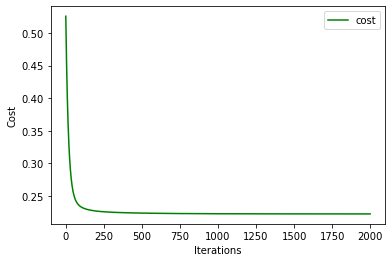

In [12]:

# the range for which one needs to run K-fold (K=5 ) so range (5,6)
for i in range(5,6):
    l=[]
    l1=[]
    X_Trains, Y_Trains, X_Tests, Y_Tests = K_fold_validation(i,norm(pd.read_csv("Real estate.csv")))
    for j in range(i):
        model=Linear_Regression1(0.01,2000)
        print("k= "+str(i)+" and model number="+str(j+1))
        model.fit(X_Trains[j],Y_Trains[j],X_Tests[j],Y_Tests[j])
        model.plot1()

### Part C
 Modify your Regression implementation by including L1 (LASSO) and L2<br>
(Ridge Regression) regularization. Implement both regularization function<br> from scratch and train the model again. Try different values of the<br> regularization parameter and report the best one. Plot similar RMSE V/s<br> iteration graph as before

In [13]:
class Linear_Regression_lasso():
    def __init__(self,l_rate,Epochs,lmd):
        
        self.l_rate=l_rate
        self.Epochs=Epochs
        self.lmd=lmd
        
    def fit(self, X, Y ,X_test,Y_test):
        
        self.m,self.n = X.shape
        on=np.ones((self.m,1))
        self.X=np.concatenate((on,X),axis=1)
        self.n=self.n+1
        self.Y=Y
        self.W=np.zeros(self.n)
        self.H=np.dot(self.X,self.W)
        self.Cost=np.zeros(self.Epochs)
        self.val_err=[]
        self.tr_err=[]
        
        
        
        for i in range(self.Epochs):
            self.upd_weight()
            self.val_err.append(self.rmse(Y_test,self.predict(X_test)))
            self.tr_err.append(self.rmse(Y,self.predict(X)))
            self.Cost[i]=np.sum(np.square(self.H-self.Y))/(2*self.m)
        #self.plot1()
        return self
    
    def upd_weight(self):
        p=0
        if(self.W[0]<0):
            p=1
        elif(self.W[0]>0):
            p=-1
            
        self.W[0]=self.W[0]-(self.l_rate/self.m)*sum(self.H-self.Y)+(p*self.lmd)
        for i in range(1,self.n):
            p=0
            if(self.W[0]<0):
                p=1
            elif(self.W[0]>0):
                p=-1
            self.W[i]=self.W[i]-(self.l_rate/self.m)*sum((self.H-self.Y)*self.X[:,i])+(p*self.lmd)
            
        self.H=np.dot(self.X,self.W)
        return self
    
    def W_C(self):
        print(self.W[0])
        print(self.W[1:])
        
    def rmse(self,y1,y2):
        mse = (np.square(y1 - y2)).mean()
        return np.sqrt(mse)
    def plot1(self):
        list1 = list(range(0,self.Epochs))
        
        plt.plot(list1,self.tr_err,label='Tranning set')
        plt.plot(list1,self.val_err,label='Validation set')
#         plt.title("k= "+str(i)+" and model number="+str(j+1)+"th")
        plt.legend()
        plt.xlabel('Iterations')
        plt.ylabel('RMSE')
        plt.show()
        
        plt.plot(list1,self.Cost,color='g',label='cost')
#         plt.title("Cost function for K = "+str(i)+" and model number="+str(j+1))
        plt.legend()
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.show()
    
    def predict(self,X):
        
        return X.dot(self.W[1:])+self.W[0]

In [14]:
class Linear_Regression_ridge():
    def __init__(self,l_rate,Epochs,lmd):
        
        self.l_rate=l_rate
        self.Epochs=Epochs
        self.lmd=lmd
        
    def fit(self, X, Y ,X_test,Y_test):
        
        self.m,self.n = X.shape
        on=np.ones((self.m,1))
        self.X=np.concatenate((on,X),axis=1)
        self.n=self.n+1
        self.Y=Y
        self.W=np.zeros(self.n)
        self.H=np.dot(self.X,self.W)
        self.Cost=np.zeros(self.Epochs)
        self.val_err=[]
        self.tr_err=[]
        
        
        
        for i in range(self.Epochs):
            self.upd_weight()
            self.val_err.append(self.rmse(Y_test,self.predict(X_test)))
            self.tr_err.append(self.rmse(Y,self.predict(X)))
            self.Cost[i]=np.sum(np.square(self.H-self.Y))/(2*self.m)
        #self.plot1()
        return self
    
    def upd_weight(self):
            
        self.W[0]=((1-2*self.l_rate*self.lmd)*self.W[0])-(self.l_rate/self.m)*sum(self.H-self.Y)
        
        for i in range(1,self.n):
            self.W[i]=((1-2*self.l_rate*self.lmd)*self.W[i])-(self.l_rate/self.m)*sum((self.H-self.Y)*self.X[:,i])
            
        self.H=np.dot(self.X,self.W)
        return self
    
    def W_C(self):
        print(self.W[0])
        print(self.W[1:])
        
    def rmse(self,y1,y2):
        mse = (np.square(y1 - y2)).mean()
        return np.sqrt(mse)
    
    def plot1(self):
        list1 = list(range(0,self.Epochs))
        
        plt.plot(list1,self.tr_err,label='Tranning set')
        plt.plot(list1,self.val_err,label='Validation set')
#         plt.title("k= "+str(i)+" and model number="+str(j+1)+"th")
        plt.legend()
        plt.xlabel('Iterations')
        plt.ylabel('RMSE')
        plt.show()
        
        plt.plot(list1,self.Cost,color='g',label='cost')
#         plt.title("Cost function for K = "+str(i)+" and model number="+str(j+1))
        plt.legend()
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.show()
    
    def predict(self,X):
        
        return X.dot(self.W[1:])+self.W[0]

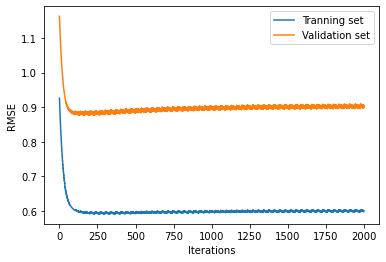

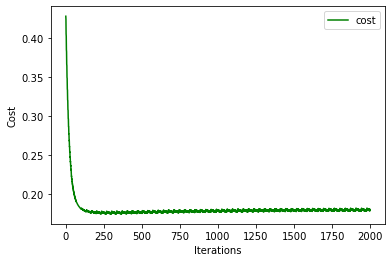

Regularisation parameter 0.01
Validation Set RMSE=> 0.9052595364454838
Tranning Set RMSE => 0.6004640526698816


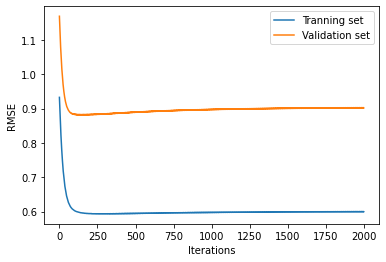

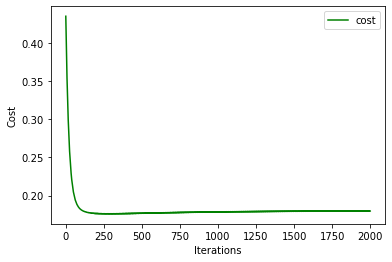

Regularisation parameter 0.001
Validation Set RMSE=> 0.9021533241674045
Tranning Set RMSE => 0.5996499679753795


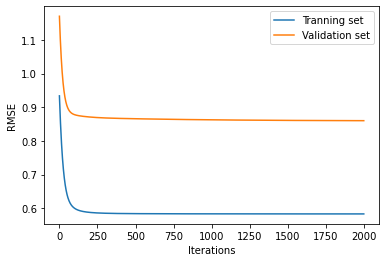

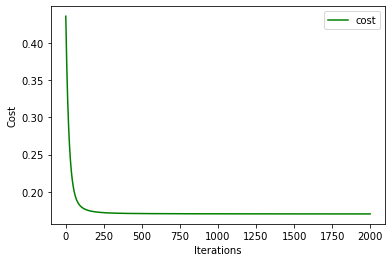

Regularisation parameter 5e-06
Validation Set RMSE=> 0.8599830377739207
Tranning Set RMSE => 0.5833127613815478


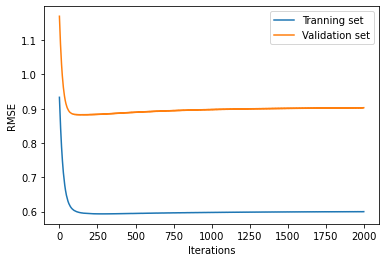

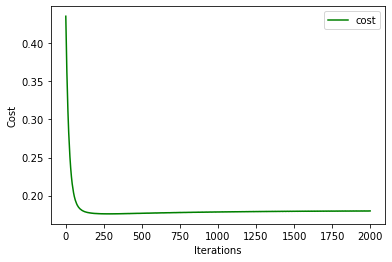

Regularisation parameter 0.0006
Validation Set RMSE=> 0.9027627515683939
Tranning Set RMSE => 0.5998633095266118


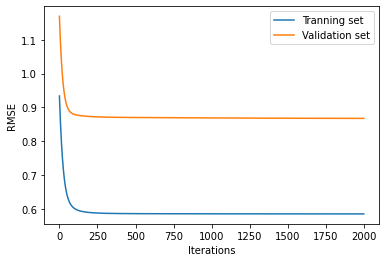

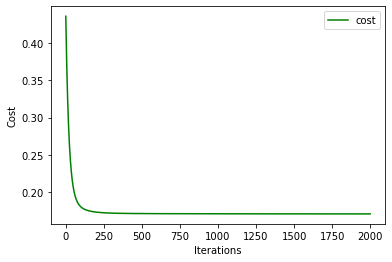

Regularisation parameter 7e-05
Validation Set RMSE=> 0.8673471706837934
Tranning Set RMSE => 0.5844403951382474


In [15]:
for i in range(5,6):
    l=[]
    l1=[]
    X_Trains, Y_Trains, X_Tests, Y_Tests = K_fold_validation(i,norm(pd.read_csv("Real estate.csv")))
    for j in range(i):
        mp=[0.01,0.001,0.000005,0.0006,0.00007]
        for m in range(5):
            model1=Linear_Regression_lasso(0.01,2000,mp[m])
            model1.fit(X_Trains[j],Y_Trains[j],X_Tests[j],Y_Tests[j])

            #we got the best split at k=5 and the 1th split so only showing that one
            if(j==1):
                model1.plot1()
                print("Regularisation parameter {}".format(mp[m]))
                print("Validation Set RMSE=> {}".format(model1.val_err[-1]))
                print("Tranning Set RMSE => {}".format(model1.tr_err[-1]))

The best parameter is 0.01

Regularisation parameter 0.01
Validation Set RMSE=> 0.5239991291862338
Tranning Set RMSE => 0.6730139364760966


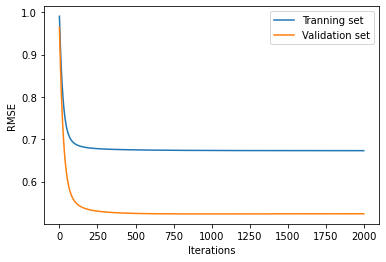

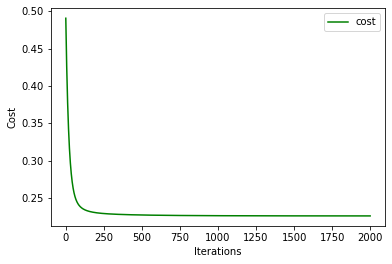

Regularisation parameter 0.001
Validation Set RMSE=> 0.5232712602950086
Tranning Set RMSE => 0.6728304370646259


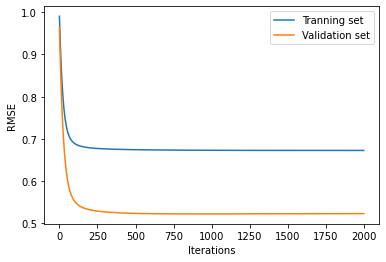

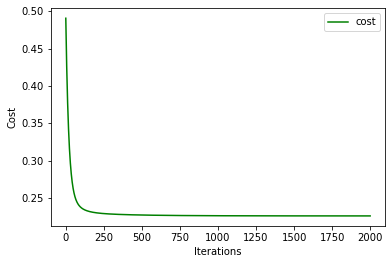

Regularisation parameter 5e-06
Validation Set RMSE=> 0.523205503196435
Tranning Set RMSE => 0.6728216809390176


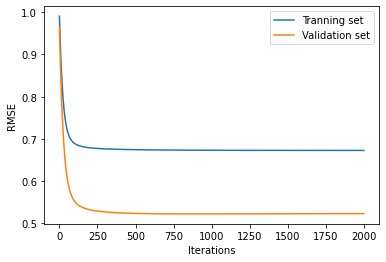

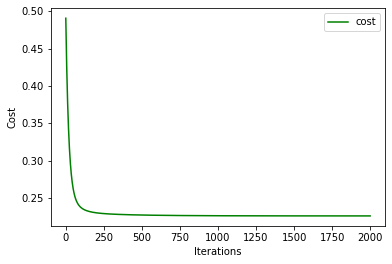

Regularisation parameter 0.0006
Validation Set RMSE=> 0.5232444313708448
Tranning Set RMSE => 0.672826604880376


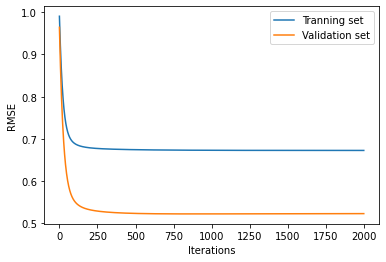

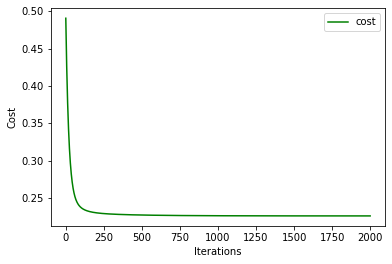

Regularisation parameter 7e-05
Validation Set RMSE=> 0.5232096981710419
Tranning Set RMSE => 0.6728221730869017


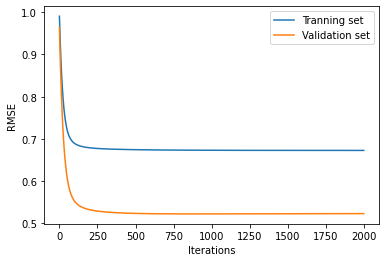

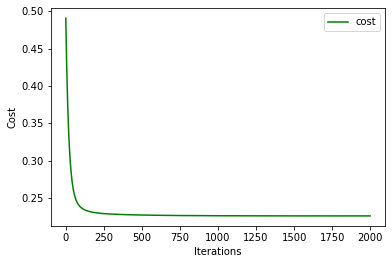

In [16]:
for i in range(5,6):
    l=[]
    l1=[]
    X_Trains, Y_Trains, X_Tests, Y_Tests = K_fold_validation(i,norm(pd.read_csv("Real estate.csv")))
    for j in range(i):
        mp=[0.01,0.001,0.000005,0.0006,0.00007]
        for m in range(5):
            model1=Linear_Regression_ridge(0.01,2000,mp[m])
            model1.fit(X_Trains[j],Y_Trains[j],X_Tests[j],Y_Tests[j])

            #we got the best split at k=5 and the 1th split so only showing that one
            if(j==1):
                
                print("Regularisation parameter {}".format(mp[m]))
                print("Validation Set RMSE=> {}".format(model1.val_err[-1]))
                print("Tranning Set RMSE => {}".format(model1.tr_err[-1]))
                model1.plot1()

The best parameter is 0.005

In [25]:
class LR_NORM():
    def __init__(self):
        self.name=0
    def fit(self, X, Y):
        
        self.m,self.n = X.shape
        on=np.ones((self.m,1))
        self.X=np.concatenate((on,X),axis=1)
        self.n=self.n+1
        self.Y=Y
        self.normal_eq()

    def normal_eq(self):
        self.W = np.linalg.inv(self.X.T.dot(self.X)).dot(self.X.T).dot(self.Y) 
    
    def predict(self,X):
        X=np.array(X)
        return X.dot(self.W[1:])+self.W[0]

In [26]:

for i in range(2,6):
    X_Trains, Y_Trains, X_Tests, Y_Tests = K_fold_validation(i,norm(pd.read_csv("Real estate.csv")))
    l_c=[]
    for j in range(i):
        model=LR_NORM()
        model.fit(X_Trains[j],Y_Trains[j])
        y_pr=model.predict(X_Tests[j])
        l_c.append(np.sqrt(np.mean(np.square(model.predict(X_Tests[j])-Y_Tests[j]))))
        print("Rmse for k={} and split ={} =>".format(i,j)+str(sum(l_c)/len(l_c)))
    print()


    

    
        
    

Rmse for k=2 and split =0 =>0.6756446887548269
Rmse for k=2 and split =1 =>0.6604265204712334

Rmse for k=3 and split =0 =>0.6541133917854346
Rmse for k=3 and split =1 =>0.6976576051546526
Rmse for k=3 and split =2 =>0.6537020357875981

Rmse for k=4 and split =0 =>0.6770590790553567
Rmse for k=4 and split =1 =>0.6281281547675499
Rmse for k=4 and split =2 =>0.6191999641902847
Rmse for k=4 and split =3 =>0.6602538105727593

Rmse for k=5 and split =0 =>0.8688665619458582
Rmse for k=5 and split =1 =>0.7588676235103131
Rmse for k=5 and split =2 =>0.7204739580173932
Rmse for k=5 and split =3 =>0.663132149920377
Rmse for k=5 and split =4 =>0.6483658795405521

